# Détection des tumeurs cérébrales avec YOLOv8

### Échantillon d’images par classe avec boîtes englobantes

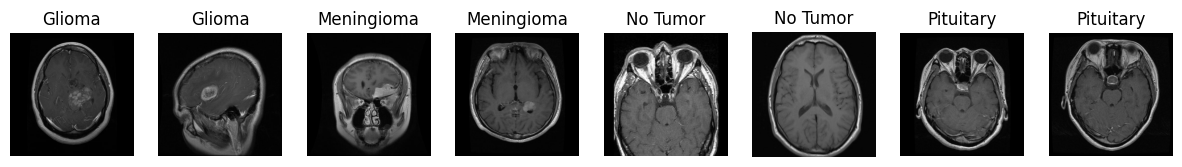

In [2]:
import os
import matplotlib.pyplot as plt
import cv2

folder = r"../../data/Data_Brain/Train"

images = []
labels = []
for i in os.listdir(folder):
    class_path = os.path.join(folder,i)

    image_folder = os.path.join(class_path,"images") 
    label_folder = os.path.join(class_path,"")
    count = 0
    for t in os.listdir(image_folder):
        if count>1:
            break
        file_path = os.path.join(image_folder,t)
        img = cv2.imread(file_path)
        images.append(img)
        labels.append(i) 
        count+=1
        
plt.figure(figsize=(15,5))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])
    plt.title(labels[i])
    plt.axis('off')


### Affichage aléatoire d’images de tumeurs cérébrales avec annotations

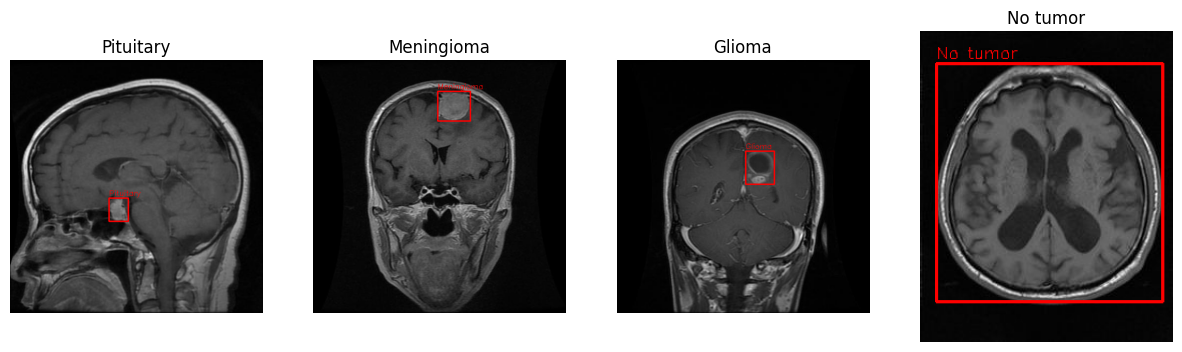

In [3]:
import os
import random
import matplotlib.pyplot as plt
import cv2

base_path = "../../data/Data_Brain/Train"
classes = ["Pituitary", "Meningioma", "Glioma", "No tumor"]

fig, axes = plt.subplots(1, len(classes), figsize=(15, 5))

for i, cls in enumerate(classes):
    img_dir = os.path.join(base_path, cls, "images")
    lbl_dir = os.path.join(base_path, cls, "labels")

    images = []
    for l in os.listdir(img_dir):
        if l.endswith((".jpg", ".png", ".jpeg")):
            images.append(l)
            
    img_name = random.choice(images)

    img_path = os.path.join(img_dir, img_name)
    lbl_path = os.path.join(lbl_dir, os.path.splitext(img_name)[0] + ".txt")

    image = cv2.imread(img_path)
    h, w = image.shape[:2]

    if os.path.exists(lbl_path):
        with open(lbl_path, "r") as f:
            for line in f:
                class_id, x_center, y_center, bw, bh = map(float, line.strip().split())
                x1 = int((x_center - bw / 2) * w)
                y1 = int((y_center - bh / 2) * h)
                x2 = int((x_center + bw / 2) * w)
                y2 = int((y_center + bh / 2) * h)

                cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)
                cv2.putText(image, cls, (x1, y1 - 5),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

    ax = axes[i]
    ax.imshow(image)
    ax.set_title(cls)
    ax.axis("off")

plt.show()


### Filtrage et copie des images de tumeurs cérébrales avec labels existants

In [9]:
import os
import shutil

root = "../../data/Data_Brain"
output_root = "../../data/Filtered_Data"

for split in ["train", "Val"]:
    for class_name in os.listdir(os.path.join(root, split)):
        src_img = os.path.join(root, split, class_name, "images")
        src_lbl = os.path.join(root, split, class_name, "labels")

        dst_img = os.path.join(output_root, "images", split)
        dst_lbl = os.path.join(output_root, "labels", split)
        os.makedirs(dst_img, exist_ok=True)
        os.makedirs(dst_lbl, exist_ok=True)

        for file in os.listdir(src_img):
            if file.lower().endswith((".jpg", ".jpeg", ".png")):
                label_file = os.path.splitext(file)[0] + ".txt"
                label_path = os.path.join(src_lbl, label_file)

                if os.path.exists(label_path):
                    shutil.copy(os.path.join(src_img, file), dst_img)
                    shutil.copy(label_path, dst_lbl)
                else:
                    print(f"⚠️  Label manquant pour l'image : {file} — Ignorée")

print("✅ Traitement terminé !")


✅ Traitement terminé !


### Comptage des images et labels par jeu de données

In [8]:
for split in ["train", "Val"]:
    img_count = len(os.listdir(os.path.join(output_root, "images", split)))
    lbl_count = len(os.listdir(os.path.join(output_root, "labels", split)))
    print(f"{split} → {img_count} images / {lbl_count} labels")


train → 4737 images / 4737 labels
Val → 510 images / 510 labels
